In [1]:
pip install pandas numpy matplotlib seaborn

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("/website_wata (1).csv")

# Show first few rows
print(df.head())

# Check missing values
print(df.isnull().sum())

# Ensure numeric columns are in correct format
df['Session Duration'] = pd.to_numeric(df['Session Duration'], errors='coerce')
df['Bounce Rate'] = pd.to_numeric(df['Bounce Rate'], errors='coerce')
df['Page Views'] = pd.to_numeric(df['Page Views'], errors='coerce')

# Drop rows with missing values
df.dropna(inplace=True)

   Page Views  Session Duration  Bounce Rate Traffic Source  Time on Page  \
0           5         11.051381     0.230652        Organic      3.890460   
1           4          3.429316     0.391001         Social      8.478174   
2           4          1.621052     0.397986        Organic      9.636170   
3           5          3.629279     0.180458        Organic      2.071925   
4           5          4.235843     0.291541           Paid      1.960654   

   Previous Visits  Conversion Rate  
0                3              1.0  
1                0              1.0  
2                2              1.0  
3                3              1.0  
4                5              1.0  
Page Views          0
Session Duration    0
Bounce Rate         0
Traffic Source      0
Time on Page        0
Previous Visits     0
Conversion Rate     0
dtype: int64


In [5]:
device_duration = df.groupby('Traffic Source')['Session Duration'].mean().reset_index()
print(device_duration)

  Traffic Source  Session Duration
0         Direct          2.692060
1        Organic          3.104197
2           Paid          2.942816
3       Referral          3.125496
4         Social          3.057273


In [7]:
device_bounce = df.groupby('Traffic Source')['Bounce Rate'].mean().reset_index()
print(device_bounce)

  Traffic Source  Bounce Rate
0         Direct     0.284581
1        Organic     0.281821
2           Paid     0.296026
3       Referral     0.266305
4         Social     0.296265


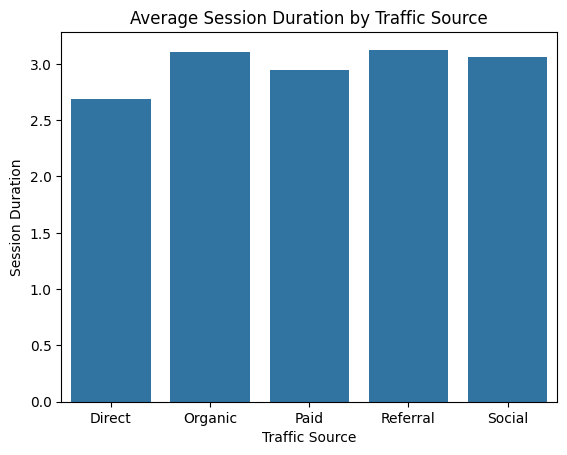

In [9]:
sns.barplot(x='Traffic Source', y='Session Duration', data=device_duration)
plt.title("Average Session Duration by Traffic Source")
plt.ylabel("Session Duration")
plt.show()

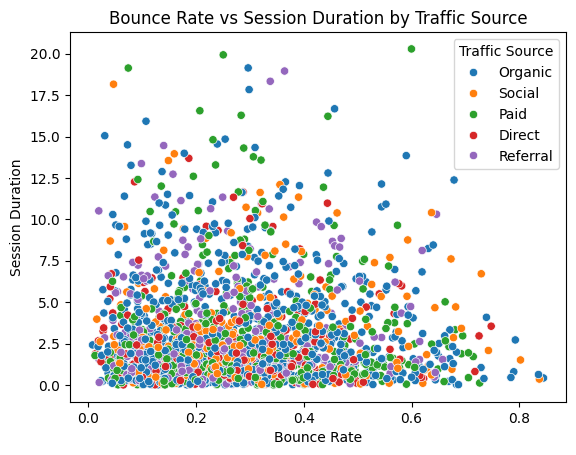

In [11]:
sns.scatterplot(x='Bounce Rate', y='Session Duration', data=df, hue='Traffic Source')
plt.title("Bounce Rate vs Session Duration by Traffic Source")
plt.show()

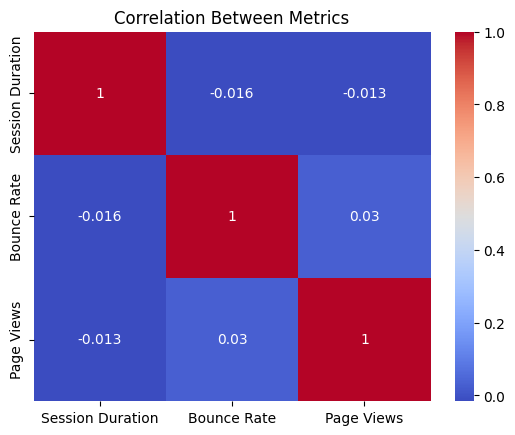

In [13]:
sns.heatmap(df[['Session Duration','Bounce Rate','Page Views']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Metrics")
plt.show()